# CIFAR 10 - MLP

#### Importing the necessary packages

In [1]:
from __future__ import print_function

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam
import matplotlib.pyplot as plt  

batch_size = 128
num_classes = 10
epochs = 100

C:\Users\ashwa\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Loading the data

In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#### Splitting the data into training and test

In [3]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

50000 train samples
10000 test samples


#### Running the base code

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 190us/step - loss: 2

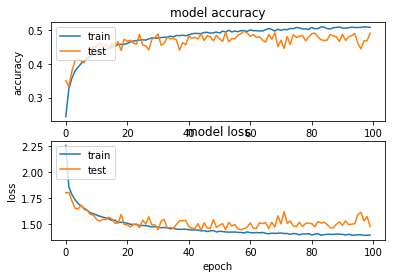

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

The models test accuracy is 49.12 % but the base model seems to overfit.

## Modifying parameters

### 1. Batch Size

### Model 1

#### batch_size = 32, num_classes = 10, epochs = 100, dropout =0.2

Decreasing the batch size doesn't help in improving the accuracy. Infact the accuracy decreases and the model training is slower. Lets try increasing the accuracy.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s 273us/step - loss: 

Epoch 52/100
50000/50000 [==============================] - 15s 310us/step - loss: 1.8801 - acc: 0.3421 - val_loss: 1.9729 - val_acc: 0.3079
Epoch 53/100
50000/50000 [==============================] - 16s 320us/step - loss: 1.8829 - acc: 0.3446 - val_loss: 1.8625 - val_acc: 0.3691
Epoch 54/100
50000/50000 [==============================] - 16s 314us/step - loss: 1.8839 - acc: 0.3430 - val_loss: 1.8425 - val_acc: 0.3678
Epoch 55/100
50000/50000 [==============================] - 16s 327us/step - loss: 1.8886 - acc: 0.3392 - val_loss: 1.8009 - val_acc: 0.3822
Epoch 56/100
50000/50000 [==============================] - 16s 320us/step - loss: 1.8932 - acc: 0.3409 - val_loss: 2.0048 - val_acc: 0.3320
Epoch 57/100
50000/50000 [==============================] - 15s 309us/step - loss: 1.8864 - acc: 0.3378 - val_loss: 1.8409 - val_acc: 0.3482
Epoch 58/100
50000/50000 [==============================] - 12s 241us/step - loss: 1.9058 - acc: 0.3358 - val_loss: 1.8451 - val_acc: 0.3512
Epoch 59/100


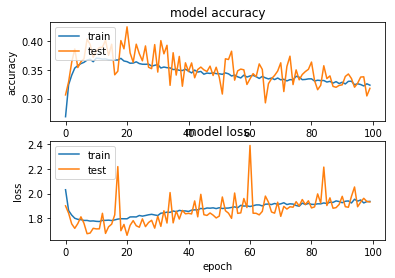

In [5]:
batch_size = 32
num_classes = 10
epochs = 100

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

### Model 2

#### batch_size = 256, num_classes = 10, epochs = 100, dropout = 0.2

The accuracy still isn't improving, so lets stick with the batch size of 128. The model is overfitting.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.

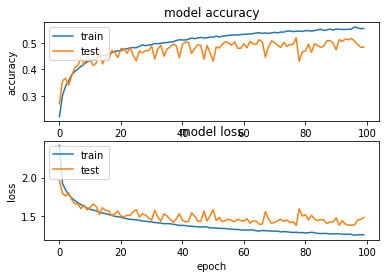

In [6]:
batch_size = 256
num_classes = 10
epochs = 100

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

### 2. Network Configuration

#### 2 a) Number of Layers

### Model 3

Now lets try adding another layer keeping the number of neurons the same.

The test and train accuracies were on par until the last epoch. The model seems to fit well.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total para

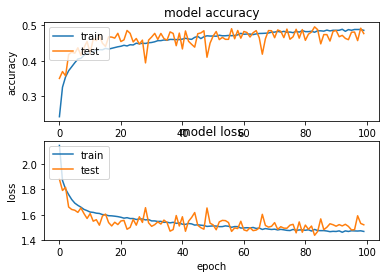

In [5]:
batch_size = 128
num_classes = 10
epochs = 100

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

#### 2 b) Number of layers

### Model 4

Here we are increasing the number of neurons in the second layer to 1024. The model seems to overfit. The test accuracy is 46.89 %

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 2,108,938
Trainable params: 2,108,938
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 92us/step - loss: 2.

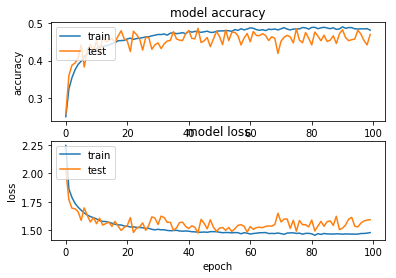

In [6]:
batch_size = 128
num_classes = 10
epochs = 100

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

### Model 5

Increasing the number of neurons to 1024 in both layers. The accuracy increases by 1%.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10250     
Total params: 4,206,602
Trainable params: 4,206,602
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 106us/step - loss: 1

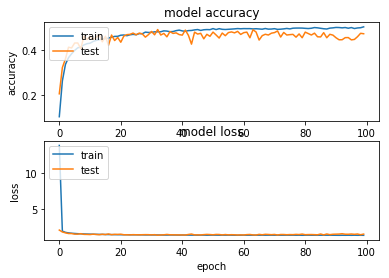

In [7]:
batch_size = 128
num_classes = 10
epochs = 100

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

### Model 6

Increased neurons to 2048 in both layers. Accuracy drops to 10%. Takes longer time to learn due to increase in neuron.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
dropout_8 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dropout_9 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                20490     
Total params: 10,510,346
Trainable params: 10,510,346
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 163us/step - loss:

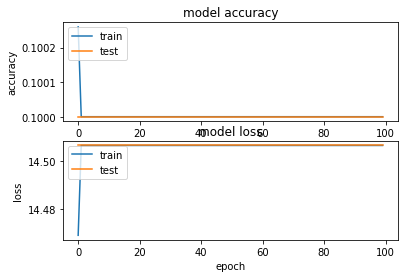

In [8]:
batch_size = 128
num_classes = 10
epochs = 100

model = Sequential()
model.add(Dense(2048, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

### Model 7

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 84us/step - loss: 2.1262

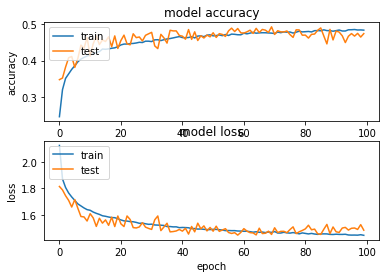

In [9]:
batch_size = 128
num_classes = 10
epochs = 100

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

Changing the number of neurons to 256 and accuracy improves to 47.47% and the moel seems to fit very well.

### Model 8

Another two layers are added each with 512 neurons. The test accuracy is 45.5 % and it fluctuates.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
__________

Epoch 107/200
50000/50000 [==============================] - 4s 84us/step - loss: 1.5606 - acc: 0.4599 - val_loss: 1.5906 - val_acc: 0.4651
Epoch 108/200
50000/50000 [==============================] - 4s 86us/step - loss: 1.5666 - acc: 0.4586 - val_loss: 1.6962 - val_acc: 0.4301
Epoch 109/200
50000/50000 [==============================] - 4s 85us/step - loss: 1.5686 - acc: 0.4566 - val_loss: 1.6992 - val_acc: 0.4128
Epoch 110/200
50000/50000 [==============================] - 4s 85us/step - loss: 1.5700 - acc: 0.4577 - val_loss: 1.5638 - val_acc: 0.4645
Epoch 111/200
50000/50000 [==============================] - 4s 84us/step - loss: 1.5513 - acc: 0.4625 - val_loss: 1.5340 - val_acc: 0.4679
Epoch 112/200
50000/50000 [==============================] - 4s 84us/step - loss: 1.5690 - acc: 0.4601 - val_loss: 1.5392 - val_acc: 0.4649
Epoch 113/200
50000/50000 [==============================] - 4s 85us/step - loss: 1.5594 - acc: 0.4619 - val_loss: 1.5729 - val_acc: 0.4475
Epoch 114/200
50000/

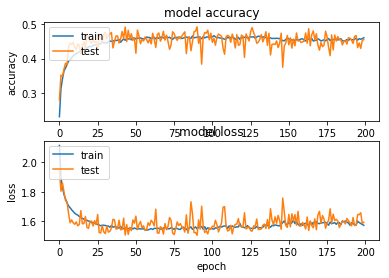

In [12]:
batch_size = 128
num_classes = 10
epochs = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

### Model 9

Changing to three layers with the top layer having 1024 neurons.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_21 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                5130      
Total para

Epoch 109/200
50000/50000 [==============================] - 5s 94us/step - loss: 1.4224 - acc: 0.5099 - val_loss: 1.4868 - val_acc: 0.4891
Epoch 110/200
50000/50000 [==============================] - 5s 93us/step - loss: 1.4192 - acc: 0.5067 - val_loss: 1.4508 - val_acc: 0.5004
Epoch 111/200
50000/50000 [==============================] - 5s 95us/step - loss: 1.4128 - acc: 0.5084 - val_loss: 1.5645 - val_acc: 0.4841
Epoch 112/200
50000/50000 [==============================] - 5s 98us/step - loss: 1.4146 - acc: 0.5108 - val_loss: 1.4292 - val_acc: 0.5085
Epoch 113/200
50000/50000 [==============================] - 5s 94us/step - loss: 1.4186 - acc: 0.5045 - val_loss: 1.4619 - val_acc: 0.4934
Epoch 114/200
50000/50000 [==============================] - 5s 93us/step - loss: 1.4199 - acc: 0.5067 - val_loss: 1.4568 - val_acc: 0.4921
Epoch 115/200
50000/50000 [==============================] - 5s 92us/step - loss: 1.4210 - acc: 0.5076 - val_loss: 1.5419 - val_acc: 0.4665
Epoch 116/200
50000/

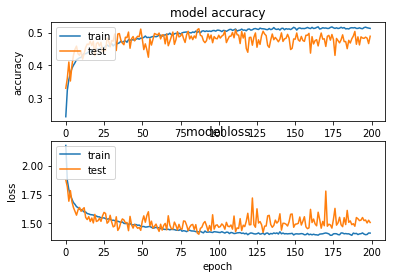

In [13]:
batch_size = 128
num_classes = 10
epochs = 200

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

By increasing the number of neurons we are able to
provide more precision to the dataset, by being able to
splice the data in various ways. Accuracy increases to 48.8 %

### 3. Learning Rates

### Model 10

Decreasng the learning rate to 0.0001 from default value of 0.001. Increases accuracy to 56% but the train accuracy is 88% which shows that the model is overfitting the dataset.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_24 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5130      
Total para

Epoch 109/200
50000/50000 [==============================] - 5s 93us/step - loss: 0.5426 - acc: 0.8068 - val_loss: 1.5547 - val_acc: 0.5626
Epoch 110/200
50000/50000 [==============================] - 5s 94us/step - loss: 0.5373 - acc: 0.8069 - val_loss: 1.5083 - val_acc: 0.5754
Epoch 111/200
50000/50000 [==============================] - 5s 93us/step - loss: 0.5322 - acc: 0.8104 - val_loss: 1.5433 - val_acc: 0.5720
Epoch 112/200
50000/50000 [==============================] - 5s 92us/step - loss: 0.5244 - acc: 0.8141 - val_loss: 1.5517 - val_acc: 0.5707
Epoch 113/200
50000/50000 [==============================] - 5s 94us/step - loss: 0.5262 - acc: 0.8128 - val_loss: 1.6129 - val_acc: 0.5654
Epoch 114/200
50000/50000 [==============================] - 5s 92us/step - loss: 0.5163 - acc: 0.8165 - val_loss: 1.4992 - val_acc: 0.5761
Epoch 115/200
50000/50000 [==============================] - 5s 93us/step - loss: 0.5177 - acc: 0.8166 - val_loss: 1.6407 - val_acc: 0.5660
Epoch 116/200
50000/

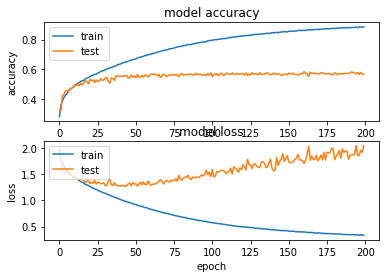

In [14]:
batch_size = 128
num_classes = 10
epochs = 200

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

### Model 11

Sticking to default value. The model fits well with the dataset.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_27 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                5130      
Total para

Epoch 109/200
50000/50000 [==============================] - 5s 94us/step - loss: 1.4284 - acc: 0.4995 - val_loss: 1.4439 - val_acc: 0.4972
Epoch 110/200
50000/50000 [==============================] - 5s 92us/step - loss: 1.4291 - acc: 0.5022 - val_loss: 1.5521 - val_acc: 0.4564
Epoch 111/200
50000/50000 [==============================] - 5s 93us/step - loss: 1.4303 - acc: 0.5000 - val_loss: 1.4469 - val_acc: 0.4993
Epoch 112/200
50000/50000 [==============================] - 5s 92us/step - loss: 1.4248 - acc: 0.5015 - val_loss: 1.4384 - val_acc: 0.4893
Epoch 113/200
50000/50000 [==============================] - 5s 93us/step - loss: 1.4243 - acc: 0.5036 - val_loss: 1.4410 - val_acc: 0.4846
Epoch 114/200
50000/50000 [==============================] - 5s 93us/step - loss: 1.4234 - acc: 0.5030 - val_loss: 1.5588 - val_acc: 0.4556
Epoch 115/200
50000/50000 [==============================] - 5s 92us/step - loss: 1.4303 - acc: 0.5008 - val_loss: 1.5091 - val_acc: 0.4645
Epoch 116/200
50000/

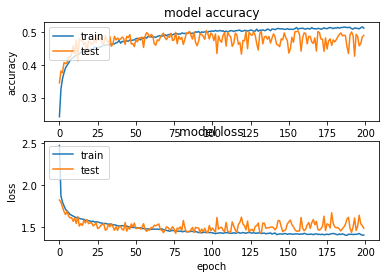

In [15]:
batch_size = 128
num_classes = 10
epochs = 200

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

### Model 12

Decreasing learning rate to 0.0008. Increases accuracy to 49%. Model fits well.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_60 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_82 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_61 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 10)                5130      
Total para

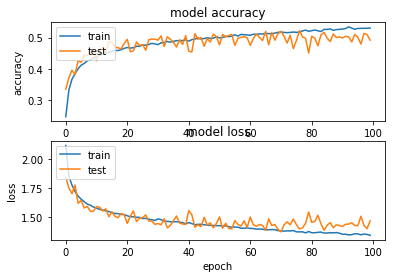

In [27]:
batch_size = 128
num_classes = 10
epochs = 100

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0008),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

### Model 13

Decreasing learning rate to 0.0001 and decreasing epoch to 25. Model learns faster and accuracy increases to 54%. By far the best model.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_39 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 10)                5130      
Total para

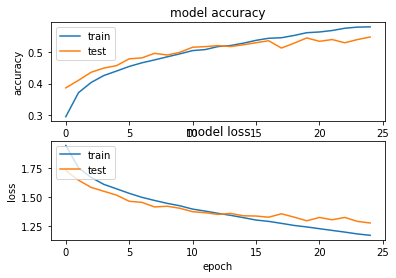

In [20]:
batch_size = 128
num_classes = 10
epochs = 25

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

### Model 14

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_66 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_90 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_67 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_68 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 10)                5130      
Total para

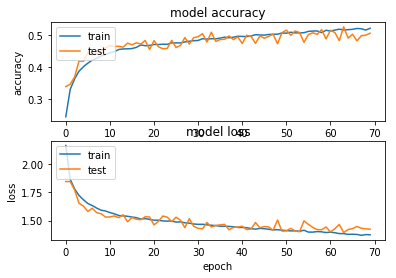

In [32]:
batch_size = 128
num_classes = 10
epochs = 70

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0008),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

A test accuracy of 0.5045 is got by modifying the learning rate to 0.0008 and the epochs to 70.

### 4. Activating functions

### Model 15

#### tanh

Accuracy is 48%

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_69 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_94 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_70 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_95 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_71 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 10)                5130      
Total para

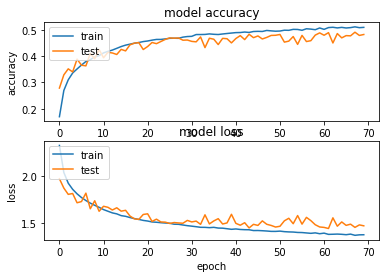

In [33]:
batch_size = 128
num_classes = 10
epochs = 70

model = Sequential()
model.add(Dense(1024, activation='tanh', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0008),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

### Model 16

#### sigmoid

Accuracy is 55% but the model is overfitting the data.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_72 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_98 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_73 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_74 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 10)                5130      
Total para

Epoch 51/70
50000/50000 [==============================] - 5s 93us/step - loss: 0.8401 - acc: 0.6955 - val_loss: 1.4642 - val_acc: 0.5409
Epoch 52/70
50000/50000 [==============================] - 5s 93us/step - loss: 0.8315 - acc: 0.7007 - val_loss: 1.3949 - val_acc: 0.5512
Epoch 53/70
50000/50000 [==============================] - 5s 93us/step - loss: 0.8245 - acc: 0.7038 - val_loss: 1.4872 - val_acc: 0.5394
Epoch 54/70
50000/50000 [==============================] - 5s 93us/step - loss: 0.8089 - acc: 0.7063 - val_loss: 1.4508 - val_acc: 0.5383
Epoch 55/70
50000/50000 [==============================] - 5s 93us/step - loss: 0.8045 - acc: 0.7118 - val_loss: 1.5002 - val_acc: 0.5320
Epoch 56/70
50000/50000 [==============================] - 5s 93us/step - loss: 0.7937 - acc: 0.7144 - val_loss: 1.4910 - val_acc: 0.5336
Epoch 57/70
50000/50000 [==============================] - 5s 93us/step - loss: 0.7865 - acc: 0.7168 - val_loss: 1.4485 - val_acc: 0.5573
Epoch 58/70
50000/50000 [=========

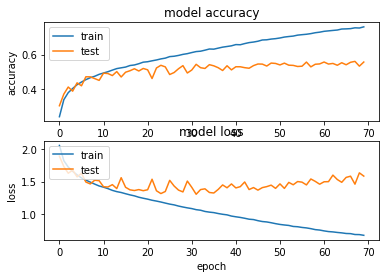

In [34]:
batch_size = 128
num_classes = 10
epochs = 70

model = Sequential()
model.add(Dense(1024, activation='sigmoid', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0008),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

### Model 17

#### Soft Sign and decreasing dropout to 0.1

Accuracy is 53%

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_75 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_102 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_76 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_77 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 10)                5130      
Total para

Epoch 51/70
50000/50000 [==============================] - 5s 93us/step - loss: 1.0985 - acc: 0.6096 - val_loss: 1.4059 - val_acc: 0.5166
Epoch 52/70
50000/50000 [==============================] - 5s 92us/step - loss: 1.0890 - acc: 0.6107 - val_loss: 1.4700 - val_acc: 0.4963
Epoch 53/70
50000/50000 [==============================] - 5s 93us/step - loss: 1.0899 - acc: 0.6110 - val_loss: 1.4058 - val_acc: 0.5211
Epoch 54/70
50000/50000 [==============================] - 5s 92us/step - loss: 1.0779 - acc: 0.6176 - val_loss: 1.3945 - val_acc: 0.5177
Epoch 55/70
50000/50000 [==============================] - 5s 93us/step - loss: 1.0679 - acc: 0.6200 - val_loss: 1.4001 - val_acc: 0.5173
Epoch 56/70
50000/50000 [==============================] - 5s 92us/step - loss: 1.0681 - acc: 0.6199 - val_loss: 1.3874 - val_acc: 0.5210
Epoch 57/70
50000/50000 [==============================] - 5s 92us/step - loss: 1.0599 - acc: 0.6211 - val_loss: 1.4045 - val_acc: 0.5120
Epoch 58/70
50000/50000 [=========

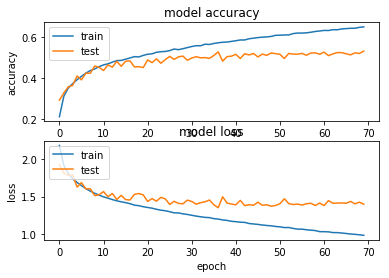

In [35]:
batch_size = 128
num_classes = 10
epochs = 70

model = Sequential()
model.add(Dense(1024, activation='softsign', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='softsign'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='softsign'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0008),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

### 5. DROPOUTS

### Model 18

Dropout = 0.1. One of the best models. Its is a good model with an accuracy of 52%.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_78 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_106 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_79 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_80 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 10)                5130      
Total para

Epoch 51/70
50000/50000 [==============================] - 5s 94us/step - loss: 1.2609 - acc: 0.5602 - val_loss: 1.4345 - val_acc: 0.5114
Epoch 52/70
50000/50000 [==============================] - 5s 95us/step - loss: 1.2647 - acc: 0.5569 - val_loss: 1.4487 - val_acc: 0.5089
Epoch 53/70
50000/50000 [==============================] - 5s 95us/step - loss: 1.2573 - acc: 0.5593 - val_loss: 1.5104 - val_acc: 0.4814
Epoch 54/70
50000/50000 [==============================] - 5s 93us/step - loss: 1.2553 - acc: 0.5634 - val_loss: 1.5015 - val_acc: 0.4903
Epoch 55/70
50000/50000 [==============================] - 5s 93us/step - loss: 1.2464 - acc: 0.5648 - val_loss: 1.4303 - val_acc: 0.5247
Epoch 56/70
50000/50000 [==============================] - 5s 96us/step - loss: 1.2445 - acc: 0.5644 - val_loss: 1.3987 - val_acc: 0.5190
Epoch 57/70
50000/50000 [==============================] - 5s 94us/step - loss: 1.2457 - acc: 0.5664 - val_loss: 1.4927 - val_acc: 0.4889
Epoch 58/70
50000/50000 [=========

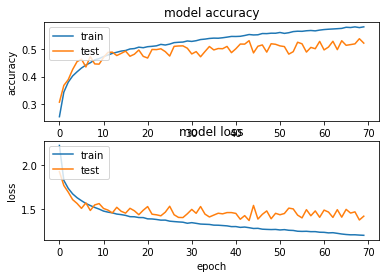

In [36]:
batch_size = 128
num_classes = 10
epochs = 70

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0008),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

### Model 19

Increasing dropout to 0.5. Accuracy drops to 36%.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_81 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_110 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_82 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_83 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 10)                5130      
Total para

Epoch 51/70
50000/50000 [==============================] - 5s 95us/step - loss: 1.8367 - acc: 0.3451 - val_loss: 1.7709 - val_acc: 0.4031
Epoch 52/70
50000/50000 [==============================] - 5s 95us/step - loss: 1.8284 - acc: 0.3483 - val_loss: 1.7748 - val_acc: 0.3873
Epoch 53/70
50000/50000 [==============================] - 5s 95us/step - loss: 1.8347 - acc: 0.3460 - val_loss: 1.7479 - val_acc: 0.4002
Epoch 54/70
50000/50000 [==============================] - 5s 96us/step - loss: 1.8362 - acc: 0.3465 - val_loss: 1.7516 - val_acc: 0.4061
Epoch 55/70
50000/50000 [==============================] - 5s 95us/step - loss: 1.8392 - acc: 0.3477 - val_loss: 1.7896 - val_acc: 0.3950
Epoch 56/70
50000/50000 [==============================] - 5s 95us/step - loss: 1.8407 - acc: 0.3475 - val_loss: 1.7772 - val_acc: 0.4023
Epoch 57/70
50000/50000 [==============================] - 5s 95us/step - loss: 1.8441 - acc: 0.3415 - val_loss: 1.7731 - val_acc: 0.3895
Epoch 58/70
50000/50000 [=========

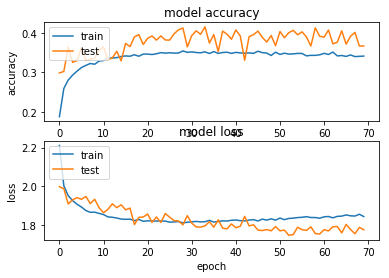

In [37]:
batch_size = 128
num_classes = 10
epochs = 70

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0008),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

## Preferred model

These is the model that works well for us.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_66 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_90 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_67 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_68 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 10)                5130      
Total para

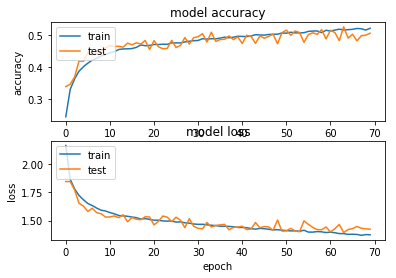

In [32]:
batch_size = 128
num_classes = 10
epochs = 70

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0008),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total para

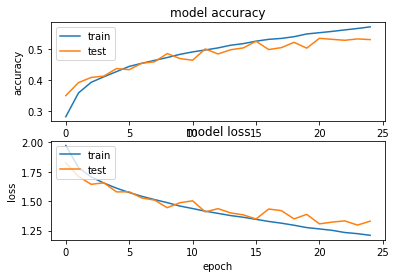

In [4]:
batch_size = 128
num_classes = 10
epochs = 25

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.00009),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


   
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

Therefore we conclude that CIFAR 10 dataset works best with slower learning rates, less dropout features and using 3 dense and dropout layers.